In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("C:\\Users\\Onwer\\Downloads\\Algerian_forest_fires_cleaned.csv")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [61]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [62]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [63]:
# Standardize the values by stripping the extra spaces
df['Classes'] = df['Classes'].str.strip()
print(df['Classes'].unique())

['not fire' 'fire']


C:\Users\Onwer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


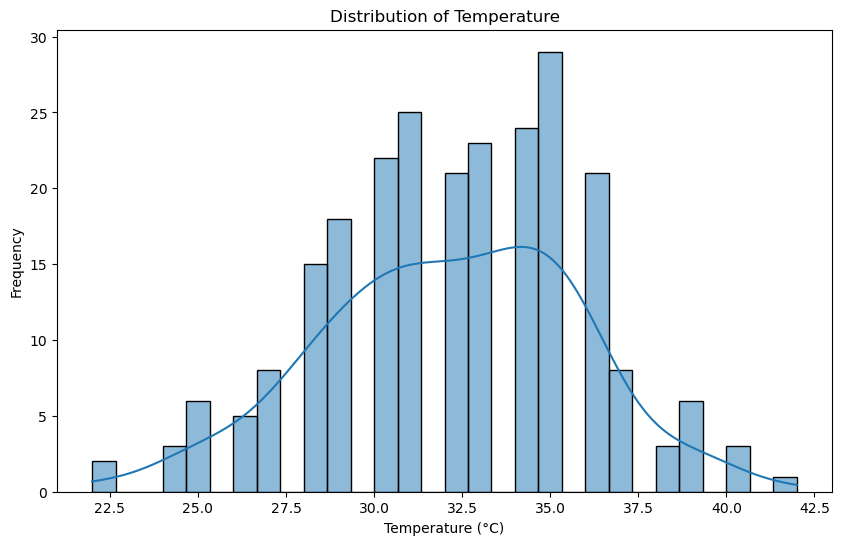

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


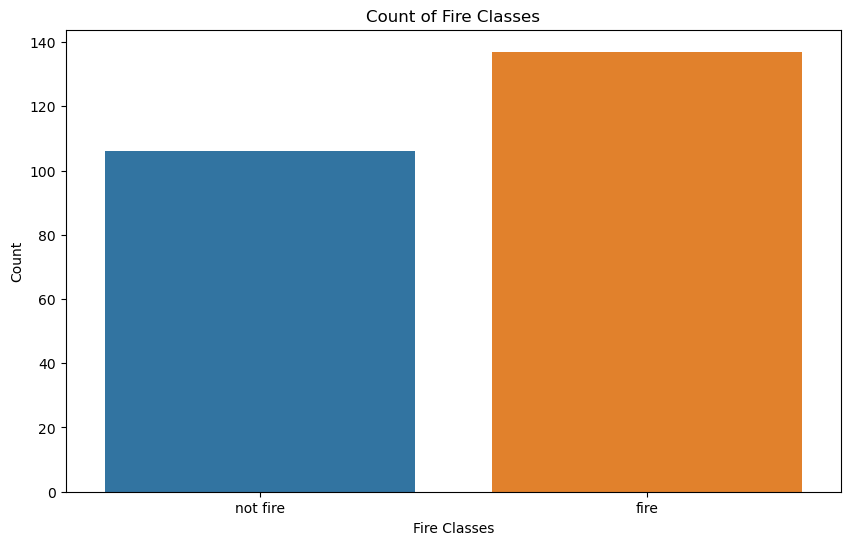

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Classes', data=df)
plt.title('Count of Fire Classes')
plt.xlabel('Fire Classes')
plt.ylabel('Count')
plt.show()


C:\Users\Onwer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Onwer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Onwer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Onwer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

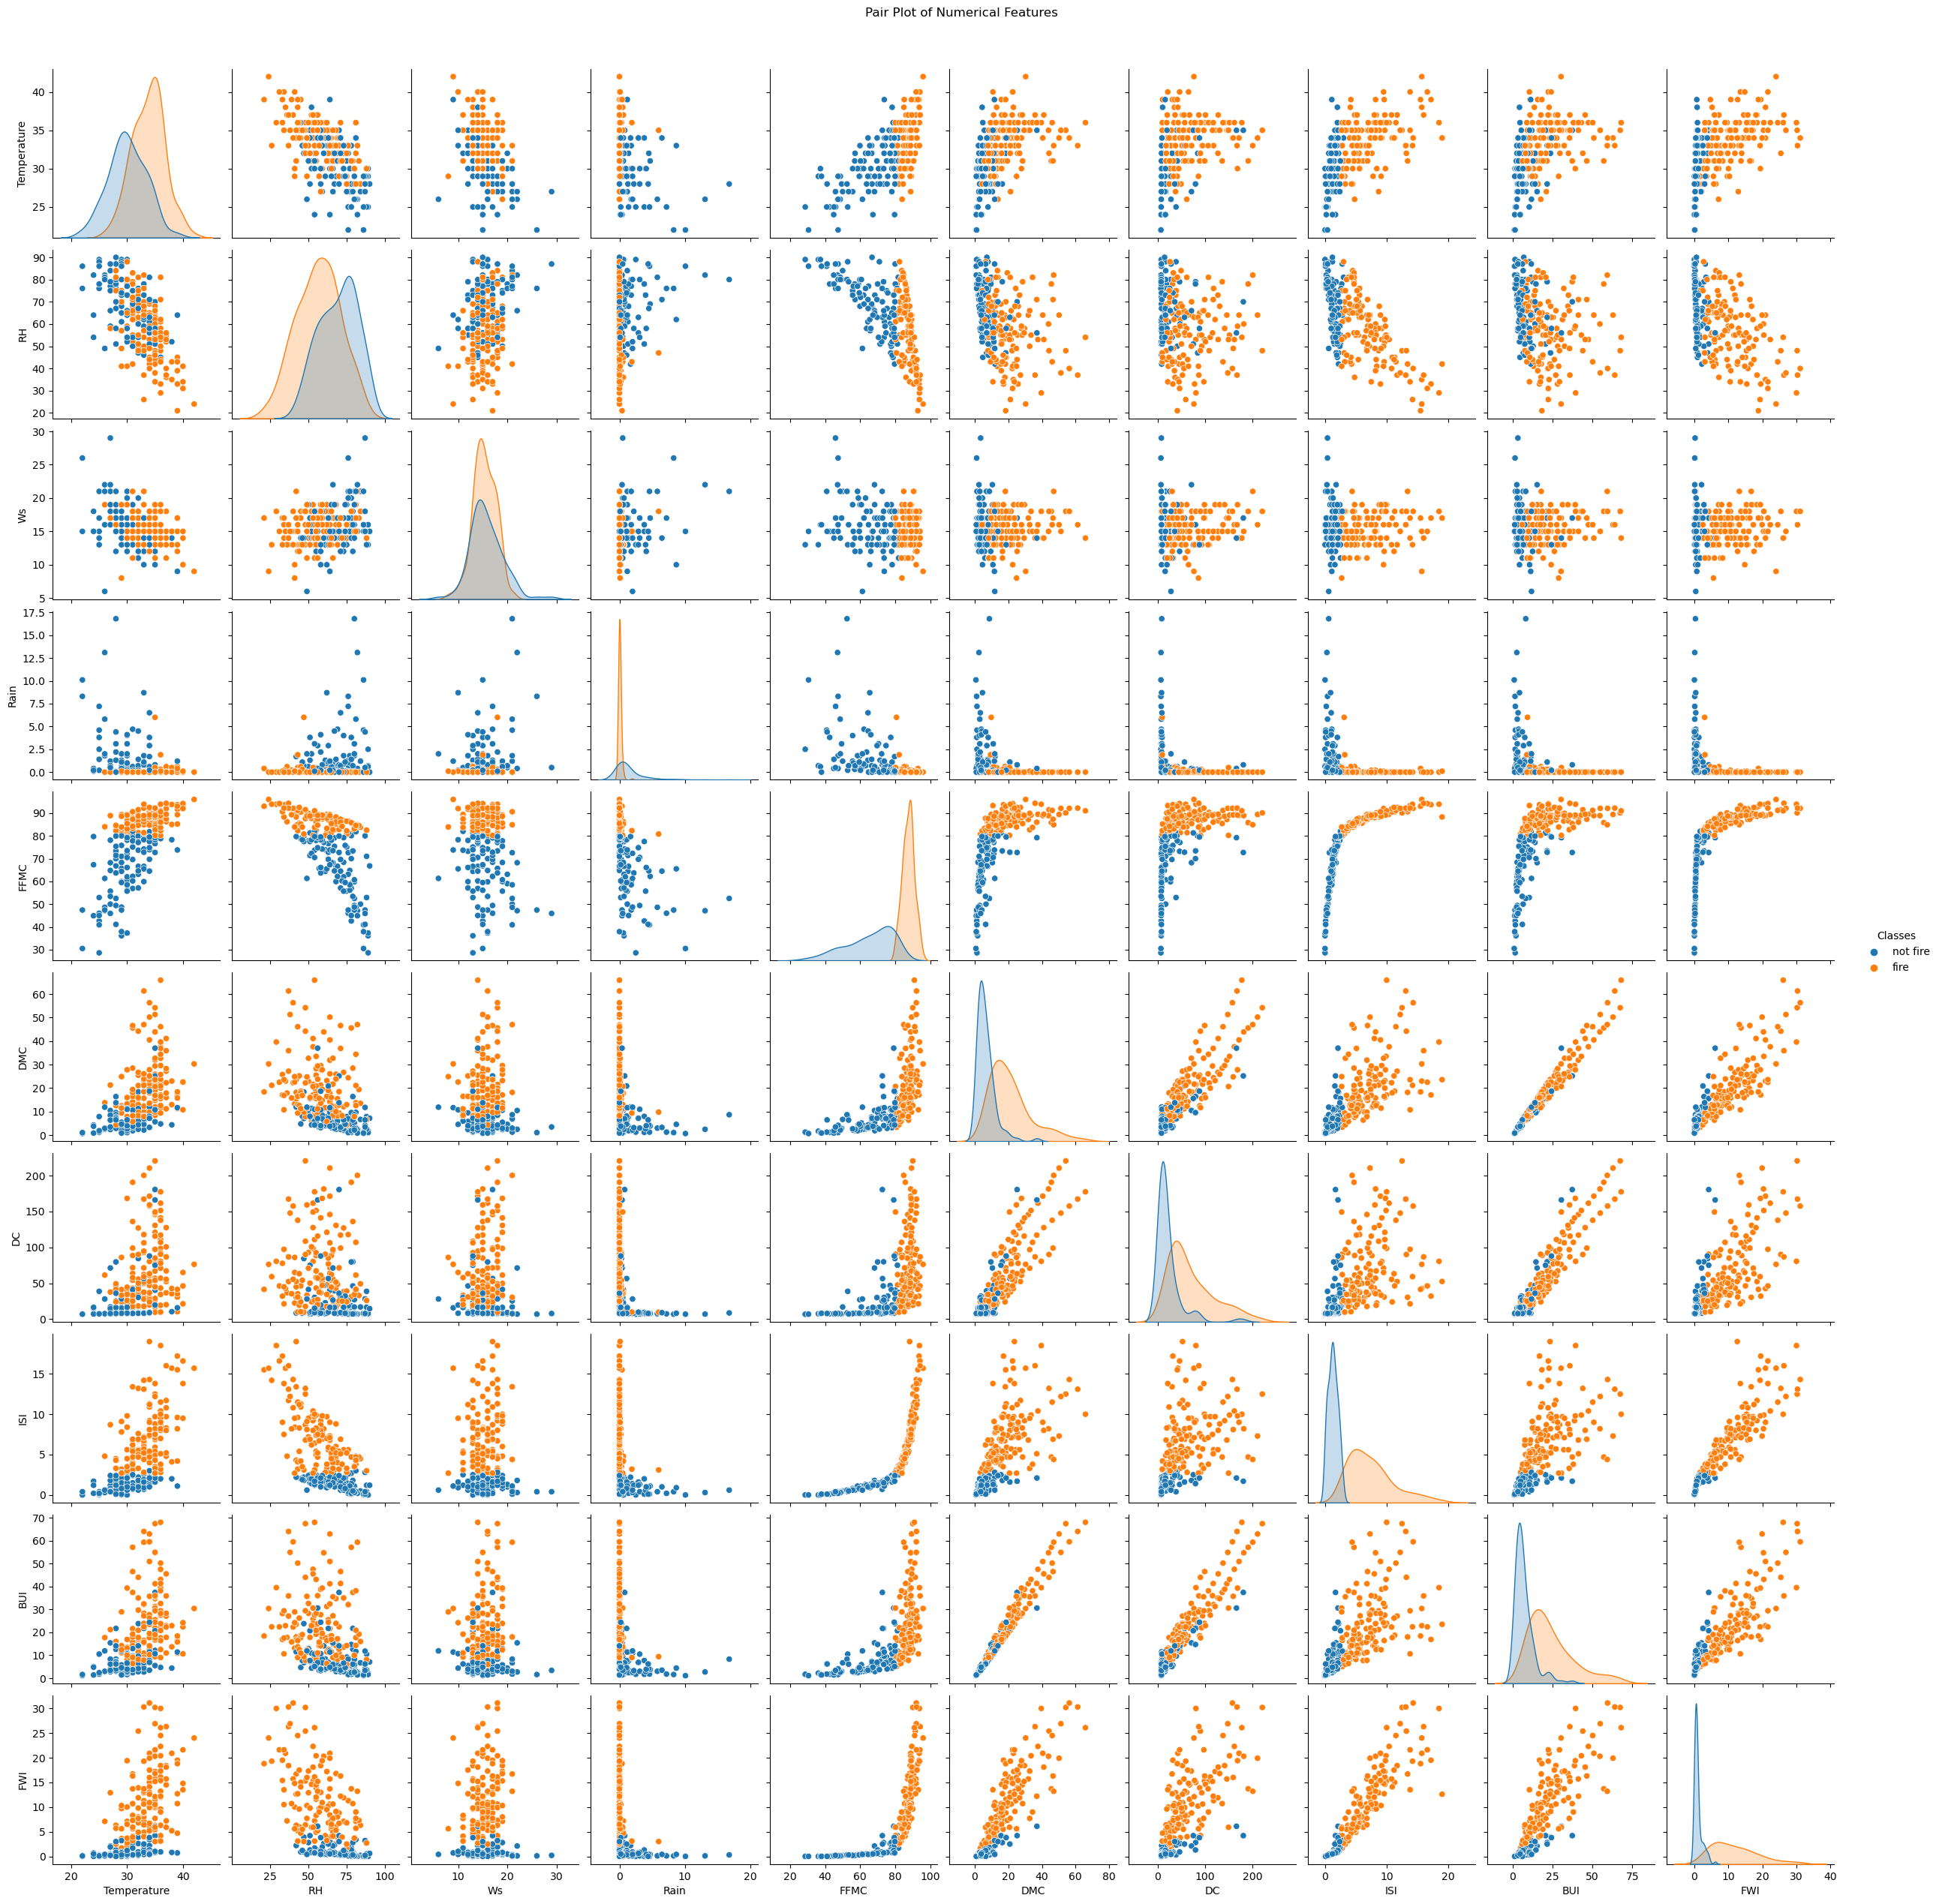

In [66]:
sns.pairplot(df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']], hue='Classes')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


C:\Users\Onwer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Onwer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


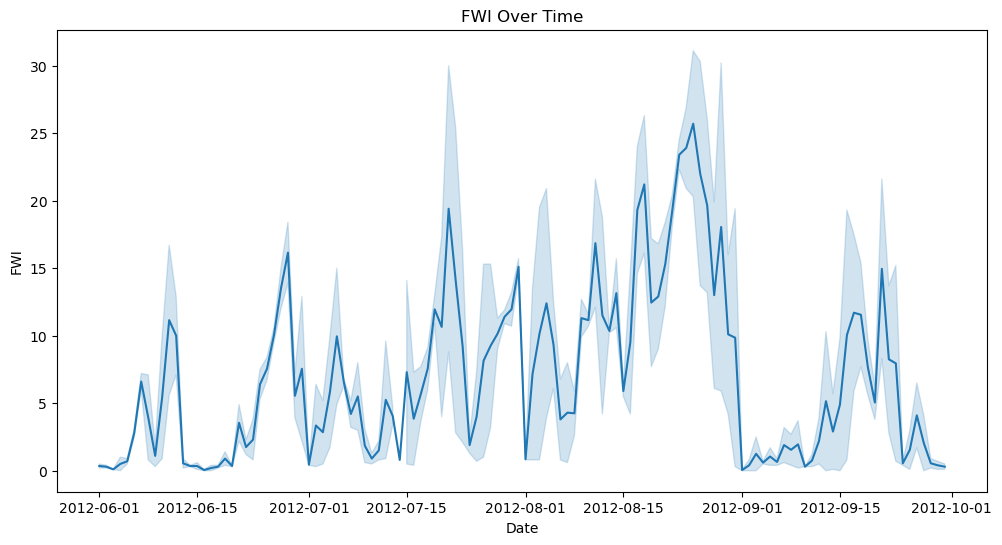

In [67]:
# Create a 'Date' column from 'day', 'month', and 'year'
df['Date'] = pd.to_datetime(df[['day', 'month', 'year']])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='FWI', data=df)
plt.title('FWI Over Time')
plt.xlabel('Date')
plt.ylabel('FWI')
plt.show()


C:\Users\Onwer\AppData\Local\Temp\ipykernel_25720\868354445.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='FWI', data=df, estimator=np.mean, ci=None)


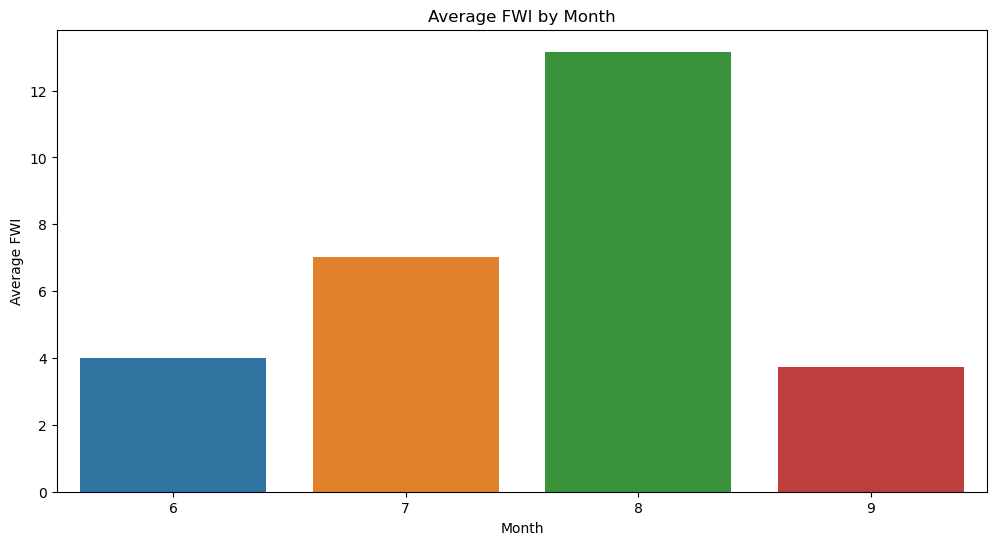

In [68]:
plt.figure(figsize=(12, 6))
df['month'] = df['month'].astype(str)  # Convert month to string for better plotting
sns.barplot(x='month', y='FWI', data=df, estimator=np.mean, ci=None)
plt.title('Average FWI by Month')
plt.xlabel('Month')
plt.ylabel('Average FWI')
plt.show()


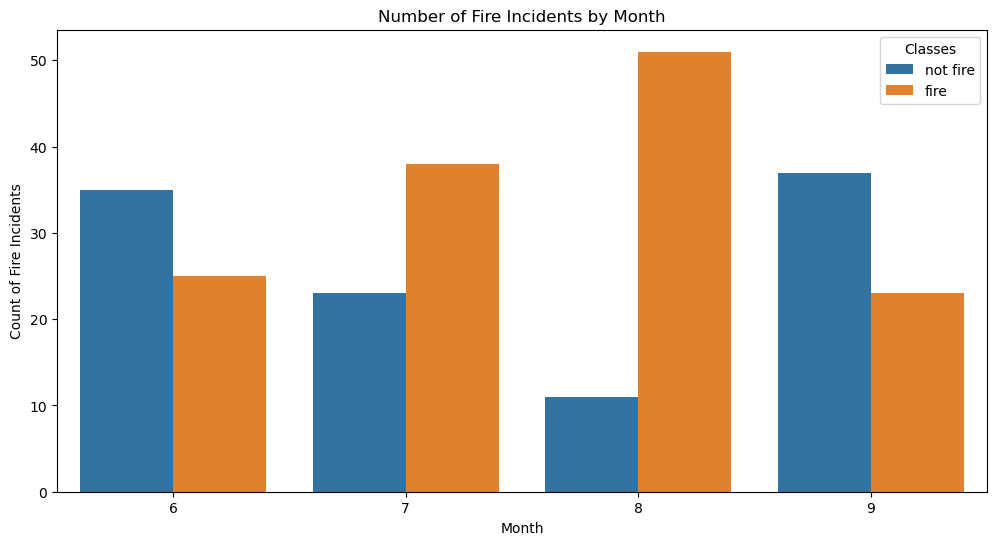

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='Classes', data=df)
plt.title('Number of Fire Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Count of Fire Incidents')
plt.legend(title='Classes', loc='upper right')
plt.show()

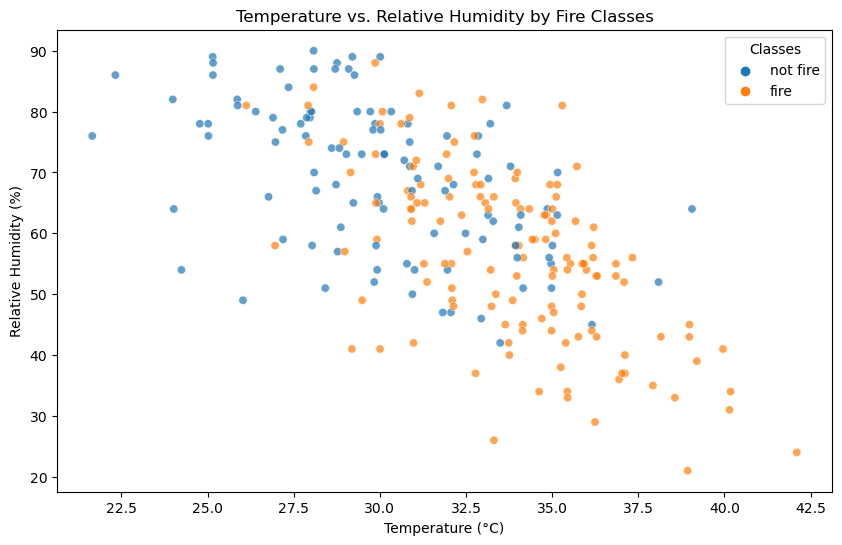

In [70]:
import numpy as np

# Add a small amount of jitter to the 'Temperature' values for better visualization
df['Temperature_jitter'] = df['Temperature'] + np.random.normal(0, 0.2, size=len(df))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature_jitter', y='RH', hue='Classes', data=df, alpha=0.7)
plt.title('Temperature vs. Relative Humidity by Fire Classes')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(title='Classes', loc='upper right')
plt.show()


In [71]:
# Map the values to binary (0 for 'not fire', 1 for 'fire')
df['Fire_Class'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [72]:
df.drop(columns=['Classes', 'day', 'month', 'year','Temperature_jitter','Date'], inplace=True)

In [73]:
from sklearn.preprocessing import StandardScaler

# List of continuous features to scale
features_to_scale = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']

# Initialize the scaler
scaler = StandardScaler()

# Scale the continuous features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verify the changes
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Date,Temperature_jitter,Fire_Class
0,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356,-0.936012,0.5,0,2012-06-01,28.776402,0
1,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720,-0.900798,0.4,0,2012-06-02,28.869015,0
2,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571,-0.985310,0.1,0,2012-06-03,25.862970,0
3,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935,-1.055737,0.0,0,2012-06-04,25.151053,0
4,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477,-0.900798,0.5,0,2012-06-05,27.175135,0


In [74]:
# Summary statistics
df.describe()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Date,Temperature_jitter,Fire_Class
count,2.430000e+02,243.000000,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,243.000000,243.000000,243,243.000000,243.000000
mean,-7.456313e-16,0.000000,-1.462022e-16,5.848088e-17,1.125757e-15,-1.900629e-16,8.041121e-17,-1.754427e-16,-8.041121e-17,7.035391,0.497942,2012-07-31 13:43:42.222222336,32.152163,0.563786
min,-2.804054e+00,-2.773497,-3.383891e+00,-3.816569e-01,-3.438694e+00,-1.130434e+00,-8.941174e-01,-1.143935e+00,-1.097993e+00,0.000000,0.000000,2012-06-01 00:00:00,21.655015,0.000000
25%,-5.944548e-01,-0.644776,-5.324458e-01,-3.816569e-01,-4.184603e-01,-7.180634e-01,-7.795432e-01,-8.062342e-01,-7.529015e-01,0.700000,0.000000,2012-07-01 00:00:00,29.849720,0.000000
50%,-4.205512e-02,0.064797,-1.760152e-01,-3.816569e-01,3.811160e-01,-2.733499e-01,-3.433203e-01,-2.996825e-01,-3.021692e-01,4.200000,0.000000,2012-08-01 00:00:00,32.138726,1.000000
75%,7.865444e-01,0.774371,5.368462e-01,-1.315419e-01,7.302759e-01,4.947916e-01,4.135001e-01,6.048742e-01,4.197068e-01,11.450000,1.000000,2012-08-31 00:00:00,34.977187,1.000000
max,2.719943e+00,1.889415,4.814014e+00,8.022206e+00,1.267982e+00,4.141442e+00,3.594248e+00,3.439152e+00,3.613568e+00,31.100000,1.000000,2012-09-30 00:00:00,42.101805,1.000000
std,1.002064e+00,1.002064,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,1.002064e+00,7.440568,0.501028,NaN,3.627715,0.496938


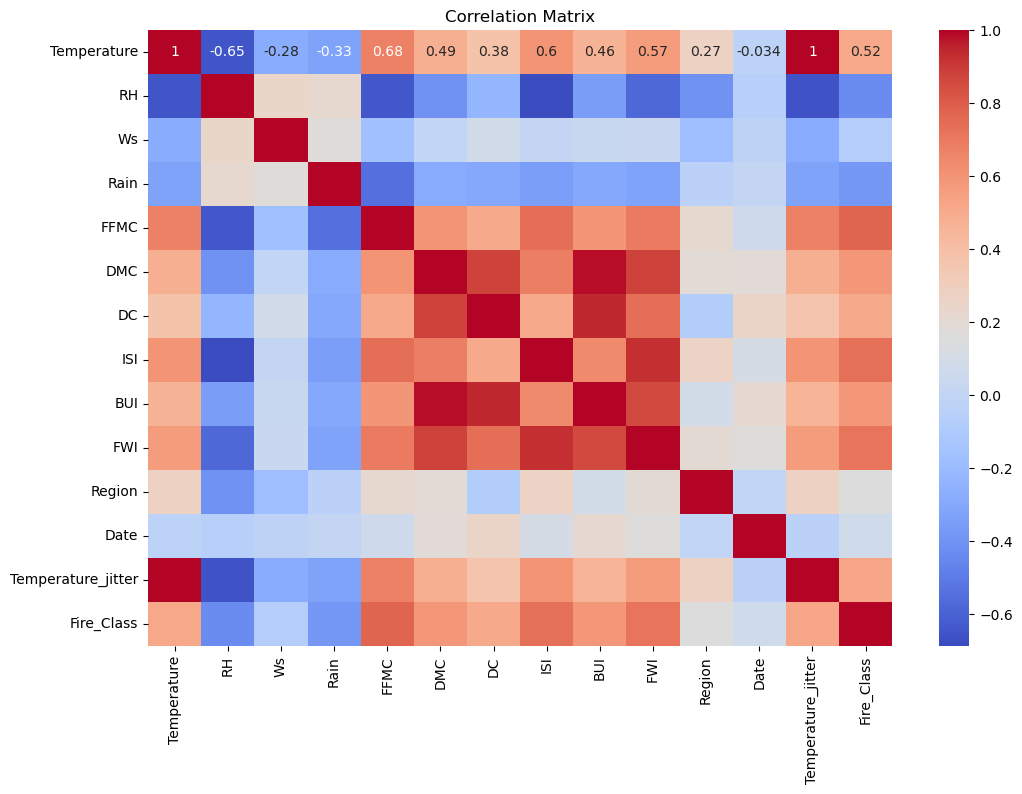

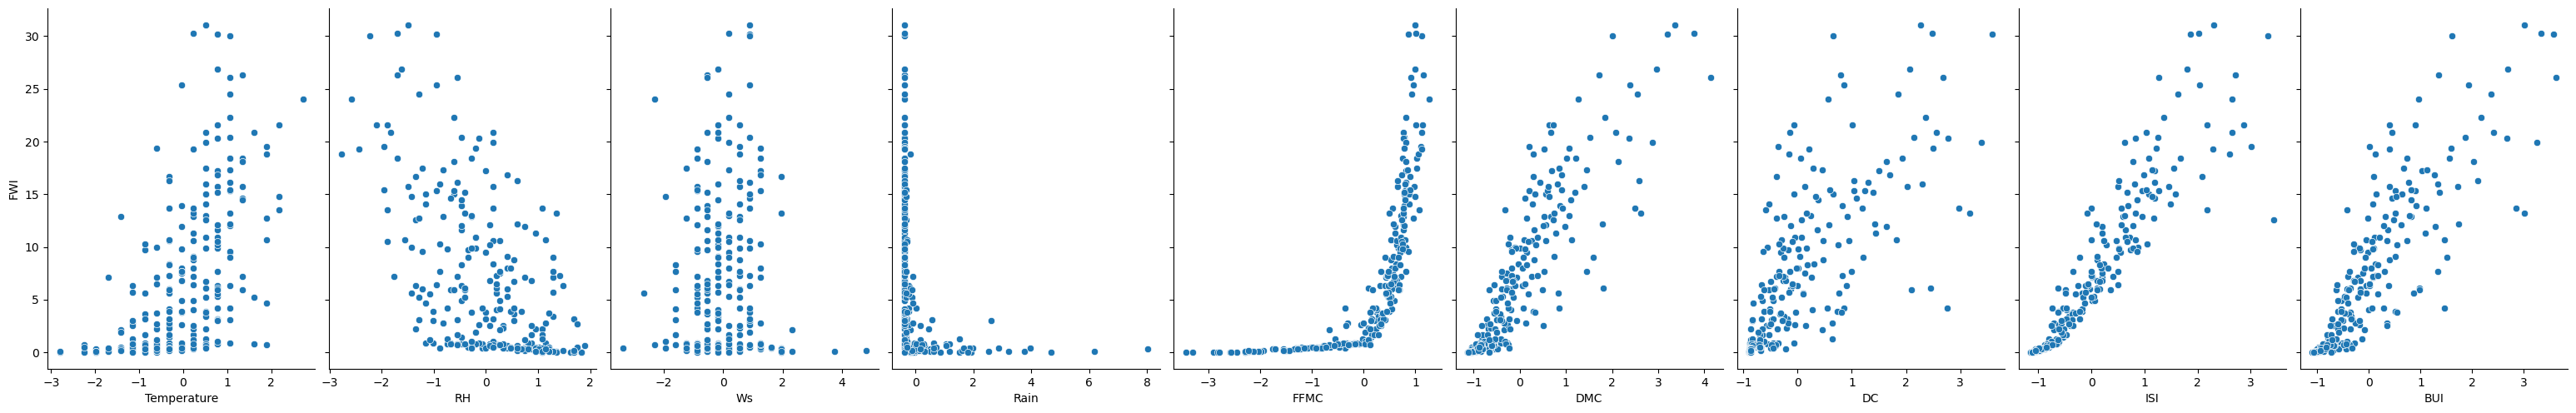

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
sns.pairplot(df, x_vars=features_to_scale, y_vars='FWI', height=5, aspect=0.7)
plt.show()


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Temperature         243 non-null    float64       
 1   RH                  243 non-null    float64       
 2   Ws                  243 non-null    float64       
 3   Rain                243 non-null    float64       
 4   FFMC                243 non-null    float64       
 5   DMC                 243 non-null    float64       
 6   DC                  243 non-null    float64       
 7   ISI                 243 non-null    float64       
 8   BUI                 243 non-null    float64       
 9   FWI                 243 non-null    float64       
 10  Region              243 non-null    int64         
 11  Date                243 non-null    datetime64[ns]
 12  Temperature_jitter  243 non-null    float64       
 13  Fire_Class          243 non-null    int64         

In [76]:
import sklearn

In [77]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df.drop(['FWI'], axis=1)
y = df['FWI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((194, 13), (49, 13), (194,), (49,))

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Train the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Polynomial Regression Model
poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test)

# Evaluate the models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression']
predictions = [y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_poly]

for model, y_pred in zip(models, predictions):
    print(f'{model}:')
    print(f'R^2 Score: {r2_score(y_test, y_pred)}')
    print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}\n')


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5)
print(f'Linear Regression CV Scores: {cv_scores}')
print(f'Average CV Score: {cv_scores.mean()}\n')

# Hyperparameter tuning for Ridge and Lasso
ridge_params = {'alpha': [0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

print(f'Best Ridge Params: {ridge_grid.best_params_}')
print(f'Best Lasso Params: {lasso_grid.best_params_}\n')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Pipeline for Polynomial Regression with Ridge Regularization
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Parameters for GridSearchCV
param_grid = {
    'poly__degree': [2, 3, 4, 5],  # Degrees to test
    'ridge__alpha': [0.1, 1, 10, 100]  # Regularization strength
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate the model with best parameters on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate RMSE and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"RMSE: {rmse}")



In [ ]:
# Cross-validation scores for the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Mean R^2 score:", np.mean(cv_scores))


In [ ]:
# Train the final model on the entire dataset
final_model = grid_search.best_estimator_
final_model.fit(X, y)

# Save the model using pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)


In [ ]:
# Load the model
with open('final_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict on the unseen data
y_test_pred = loaded_model.predict(X_test)

# Calculate RMSE and R^2 for the unseen data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set R^2 Score: {r2_test}")
print(f"Test Set RMSE: {rmse_test}")